<a href="https://colab.research.google.com/github/laraibnawaz/assignment01/blob/main/basic_chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install -q -U langchain
%pip install -q -U langchain-google-genai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 1.7 MB/s eta 0:00:00


In [2]:
# # Import the IPython library to access its application instance
# import IPython

# # Retrieve the current IPython application instance
# app = IPython.Application.instance()

# # Perform a complete shutdown of the current IPython kernel including restarting the kernel
# # it will help the environment to access the new packages
# app.kernel.do_shutdown(True)

# {'status': 'ok', 'restart': True}

In [3]:
# Import the textwrap module for text formatting and indentation
import textwrap

# Import the Markdown display function from IPython to render text as Markdown in Jupyter Notebooks
from IPython.display import Markdown

# Define a function 'to_markdown' that converts a given text into Markdown format
def to_markdown(text) -> Markdown:
    # Replace bullet points (•) with Markdown-compatible bullet points (*)
    text: str = text.replace("•", "  *")

    # Indent the entire text block with the Markdown blockquote symbol ('> ')
    # The lambda function ensures every line is indented
    return Markdown(textwrap.indent(text, "> ", predicate=lambda _: True))

In [4]:
from google.colab import userdata
google_api_key = userdata.get('GEMINI_API_KEY')

In [5]:
# Import the ChatGoogleGenerativeAI class from the langchain_google_genai module
# this will be used for using langchain with gemni
from langchain_google_genai import ChatGoogleGenerativeAI

# Import the AIMessage class currently will be used for typing
from langchain_core.messages.ai import AIMessage

# Initialize an instance of the ChatGoogleGenerativeAI with specific parameters
llm: ChatGoogleGenerativeAI = ChatGoogleGenerativeAI(
    model="gemini-1.5-flash",  # Specify the model to use
    api_key=google_api_key,     # Provide the Google API key for authentication
    temperature=0.2,            # Set the randomness of the model's responses (0 = deterministic, 1 = very random)
)

In [6]:
ai_msg: AIMessage = llm.invoke("what is the best niche for making an agent")

In [7]:
ai_msg

AIMessage(content='There\'s no single "best" niche for creating an AI agent, as the ideal niche depends heavily on your skills, resources, and market analysis.  However, some promising and potentially lucrative niches with high demand include:\n\n**High-Demand Niches:**\n\n* **Customer Service & Support:**  Agents can handle FAQs, troubleshoot issues, and provide personalized support across various platforms (chatbots, email, etc.).  This is a massive market with ongoing need for automation.\n* **Personalized Education & Tutoring:** Agents can adapt to individual learning styles, provide customized feedback, and offer targeted practice exercises.  The edtech space is booming.\n* **Financial & Investment Management:**  Agents can analyze market data, provide investment recommendations (with appropriate disclaimers!), and manage portfolios (with regulatory compliance).  Requires deep expertise and careful consideration of legal and ethical implications.\n* **Healthcare & Wellness:** Agen

In [8]:
ai_msg: AIMessage = llm.invoke("how can focus on the acheivement of goals ???")

In [9]:
ai_msg

AIMessage(content='Focusing on the achievement of goals requires a multifaceted approach. Here\'s a breakdown of strategies you can use:\n\n**1. Goal Setting:**\n\n* **SMART Goals:**  Ensure your goals are **Specific, Measurable, Achievable, Relevant, and Time-bound.**  Vague goals are hard to track and achieve.  Instead of "Get in shape," aim for "Lose 10 pounds by June 1st by exercising 3 times a week and following a calorie-controlled diet."\n* **Prioritize:**  Focus on the most important goals first.  Don\'t try to tackle everything at once.  Use methods like the Eisenhower Matrix (urgent/important) to prioritize tasks.\n* **Break Down Large Goals:**  Overwhelmingly large goals can be paralyzing. Break them down into smaller, manageable steps.  This makes progress feel more attainable and provides a sense of accomplishment along the way.\n* **Write it Down:**  The act of writing down your goals makes them more concrete and increases your commitment.  Consider using a journal, plann

In [10]:
ai_msg.content

'Focusing on the achievement of goals requires a multifaceted approach. Here\'s a breakdown of strategies you can use:\n\n**1. Goal Setting:**\n\n* **SMART Goals:**  Ensure your goals are **Specific, Measurable, Achievable, Relevant, and Time-bound.**  Vague goals are hard to track and achieve.  Instead of "Get in shape," aim for "Lose 10 pounds by June 1st by exercising 3 times a week and following a calorie-controlled diet."\n* **Prioritize:**  Focus on the most important goals first.  Don\'t try to tackle everything at once.  Use methods like the Eisenhower Matrix (urgent/important) to prioritize tasks.\n* **Break Down Large Goals:**  Overwhelmingly large goals can be paralyzing. Break them down into smaller, manageable steps.  This makes progress feel more attainable and provides a sense of accomplishment along the way.\n* **Write it Down:**  The act of writing down your goals makes them more concrete and increases your commitment.  Consider using a journal, planner, or goal-settin

In [11]:
%%capture --no-stderr
%pip install --quiet -U langgraph

In [12]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages


class State(TypedDict):
    # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)

In [13]:
def chatbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}


# The first argument is the unique node name
# The second argument is the function or object that will be called whenever
# the node is used.
graph_builder.add_node("chatbot", chatbot)

In [14]:
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

In [15]:
graph = graph_builder.compile()

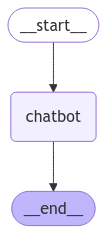

In [16]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [17]:
def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [{"role": "user", "content": user_input}]}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)


while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break

        stream_graph_updates(user_input)
    except:
        # fallback if input() is not available
        user_input = "What do you know about LangGraph?"
        print("User: " + user_input)
        stream_graph_updates(user_input)
        break

User: what is sdk
Assistant: SDK stands for **Software Development Kit**.  It's a collection of software development tools that allows programmers to create applications for a specific software package, software framework, hardware platform, computer system, video game console, operating system, etc.

Think of it as a toolbox.  Instead of having to build every single tool from scratch (like writing your own code to handle network connections or graphics rendering), an SDK provides pre-built components, libraries, and documentation that you can use to speed up the development process.  This includes:

* **Libraries:** Pre-written code modules that provide specific functionalities (e.g., a library for handling image processing or database interactions).
* **APIs (Application Programming Interfaces):**  A set of rules and specifications that allow different software components to communicate with each other.  The SDK often provides the tools and documentation needed to use these APIs.
* *